# section3 

In [4]:
from sklearn import datasets
import numpy as np

In [5]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

### train_test_split
stratify=y
層化サンプリングの使用  
→クラスラベルの比率を同じにする

In [7]:
print('Label counts in y:', np.bincount(y))
print('Label counts in y_train:', np.bincount(y_train))
print('Label counts in y_test:', np.bincount(y_test))

Label counts in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_test: [15 15 15]


### np.bincount
カテゴリそれぞれの数を数えリストで出力

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### StandardScaler
平均と標準偏差を用いて標準化  
sklearn.preprocessing import StandardScaler  
でインポート  
1. オブジェクトの作成　　sc = StandardScaler()
2. 平均と標準偏差の計算　　sc.fit(X_train)
3. transformメソッドで標準化　　sc.transform()

In [9]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

C:\Users\hiroyuki\Downloads\deeplearning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [10]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


In [13]:
from sklearn import __version__ as sklearn_version
from distutils.version import LooseVersion
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')


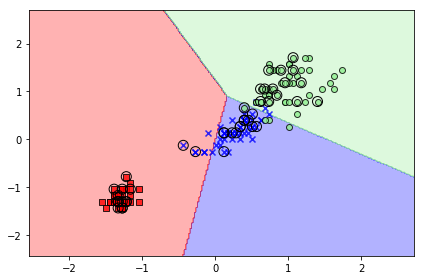

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.tight_layout()
plt.show()

### numpyで結合
np.hstack((a,b))  
a,bを横方向に結合  
axis=1が違うだけなら、hstackで結合可能ですね。  



np.vstack((a,b))  
a,bを縦方向に結合  
縦方向(vertical)に連結します。厳密にいうと、axis=0の方向です。  

### plt.gca, plt.gcf
直前に操作したfigureは、現在の図 (current figure)となり、直前に操作したaxesは、現在の軸(current axes)となる。現在のfigureはgcf(get current figureの略?)で取得でき、現在のaxesはgca(get current axesの略?)で取得できる。

### numpyで数値が指定範囲にいない場合に、指定範囲のmin/maxに置き換えたい→np.clip()

### LogisticRegressionで特定のクラスに属する確率の計算
lr**.predict_prova()**

### numpy最大値の計算
np.argmax(axis=)

過学習→高バリアンス  
トレーニングデータのランダム性に敏感である  
学習不足→高バイアス  
真の値からどの程度離れているかを定量化する指標。系統誤差。

### 正則化について
バイアスとバリアンスのトレードオフを探る方法の一つ  
→正則化によってモデルの複雑さを調整する  
正則化は**共線性**を処理する非常に便利な手法である。  
→データからノイズを取り除くことができる。

### 正則化を正常に機能させるには、すべての特徴量が比較可能な尺度に（標準化などのスケーリング）なるようにする必要がある

### L2正則化
荷重減衰。
### C=1/λ(正則化パラメータ)

### ロジスティック回帰とSVM
結果は非常によく似たものとなる。ロジスティック回帰は尤度を最大化しようとするので外れ値の影響を受けやすい。しかし、ロジスティック回帰は単純なモデルで更新も容易のためストリーミングデータを扱う際も有用である。

### 動径基底カーネル（RBFカーネル）（ガウスカーネル）
最も広く使用されているカーネル。カーネルとはすなわち**類似性**であるともいえる  
SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)  
gammaはカーネル関数の限界値条件である。大きくなると決定境界が狭くなる。

### 決定木
不純度の指標には主に３つある。ジニ不純度。エントロピー。分類誤差。エントロピーもジニもクラスが完全に混合されてる場合最大になってしまう。この二つは似た結果になる。異なる不純度条件を使って評価することに多くの時間を割く必要はない。分類誤差を使わずほかの二つを使うほうが情報利得が多くなることが多い。

### RandomForest
ブーストラップ標本のサイズ、ランダムに選択される特徴量の個数は**最適化**が可能である。  
ブーストラップ標本小さく→ランダム性上昇。過学習抑える。全体の性能は落ちる。  
ブーストラップ標本大きく→過学習に陥りやすい  
n_jobsパラメータでトレーニングの並列処理(デフォルトは１、全コア使用する場合は-１を指定する。)  


knnや決定木は正則化ができない。特徴選択や次元削減を行うと次元の呪いからのがれることができる。  

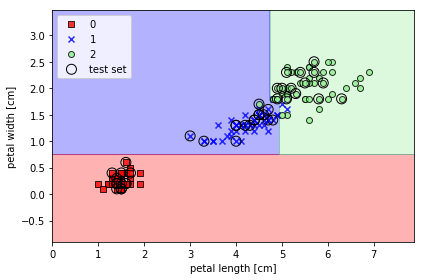

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

In [31]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

In [32]:
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found